In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.spatial.distance import cdist
from typing import Tuple
import os
from skimage.io import imread
from tqdm.notebook import tqdm
import random

In [6]:
def select_samples_same_size(path, window_size, num_window):
    data = []
    for image_path in os.listdir(path):
        image = imread(os.path.join(path,image_path), as_gray=True)
        n, p = image.shape
        for i in range(0,num_window):
            x_min = random.randint(0,n-window_size[0])
            y_min = random.randint(0,p-window_size[1])
            im = image[x_min:x_min+window_size[0],y_min:y_min+window_size[1]]
            data.append(im)
    return np.array(data)

In [23]:
window_size, num_window = [50,50], 5
path = 'images'
data = select_samples_same_size(path, window_size, num_window)

(175, 50, 50)


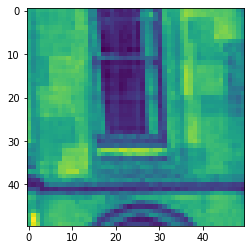

In [38]:
print(data.shape)
plt.imshow(data[0])
plt.show()

In [21]:
import cv2
def img_to_sig(arr):
    """Convert a 2D array to a signature for cv2.EMD"""
    
    # cv2.EMD requires single-precision, floating-point input
    sig = np.empty((arr.size, 3), dtype=np.float32)
    count = 0
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            sig[count] = np.array([arr[i,j], i, j])
            count += 1
    return sig

In [22]:
sig1 = img_to_sig(data[0])
sig2 = img_to_sig(data[1])
dist = cv2.EMD(sig1, sig2, cv2.DIST_L2)[0]
print(dist)

(2500, 3)
9.156500891549513e-05


In [31]:
def all_distances(root, remaining_points):
    root_sig = img_to_sig(root)
    distances = []
    for point in tqdm(remaining_points):
        point_sig = img_to_sig(point)
        distances.append(cv2.EMD(root_sig, point_sig, cv2.DIST_L2)[0])
    return distances

In [29]:
root = data[0]
points = np.array(data[1:10])

In [34]:
distances = all_distances(root, points)

In [37]:
print(distances)

[0.0, 0.006016458384692669, 0.0, 0.21332384645938873, 0.0, 0.2300211638212204, 0.14430829882621765, 0.28081583976745605, 0.0]
